In [2]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
# pandas as pd     
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# statsmodels as sm    
try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')

# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

NumPy already installed, only imported
pandas already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported


In [3]:
cupolaWifiData = pd.read_csv("../data/cupola_wifi.csv", low_memory=False)

In [4]:
df = pd.DataFrame(cupolaWifiData)

In [5]:
df = df[['Date Time', 'Total Online Devices']]

In [6]:
df

,Date Time,Total Online Devices
0,1-9-2023 00:00:00 - 01:00:00,61 #
1,1-9-2023 01:00:00 - 02:00:00,58 #
2,1-9-2023 02:00:00 - 03:00:00,57 #
3,1-9-2023 03:00:00 - 04:00:00,57 #
4,1-9-2023 04:00:00 - 05:00:00,57 #
...,...,...
4365,29-2-2024 20:00:00 - 21:00:00,63 #
4366,29-2-2024 21:00:00 - 22:00:00,65 #
4367,29-2-2024 22:00:00 - 23:00:00,60 #
4368,29-2-2024 23:00:00 - 00:00:00,55 #


In [7]:
#Data cleaning
df['Total Online Devices'] = df['Total Online Devices'].str.replace('#', '').astype(float)
df.dropna(subset=['Total Online Devices'], inplace=True)
df['Total Online Devices'] = df['Total Online Devices'].astype(int)

In [8]:
df

,Date Time,Total Online Devices
0,1-9-2023 00:00:00 - 01:00:00,61
1,1-9-2023 01:00:00 - 02:00:00,58
2,1-9-2023 02:00:00 - 03:00:00,57
3,1-9-2023 03:00:00 - 04:00:00,57
4,1-9-2023 04:00:00 - 05:00:00,57
...,...,...
4365,29-2-2024 20:00:00 - 21:00:00,63
4366,29-2-2024 21:00:00 - 22:00:00,65
4367,29-2-2024 22:00:00 - 23:00:00,60
4368,29-2-2024 23:00:00 - 00:00:00,55


In [9]:
df['datetime'] = df['Date Time'].str.split(' - ').str[0]
df.drop(df.tail(1).index, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S')

In [10]:
df

,Date Time,Total Online Devices,datetime
0,1-9-2023 00:00:00 - 01:00:00,61,2023-09-01 00:00:00
1,1-9-2023 01:00:00 - 02:00:00,58,2023-09-01 01:00:00
2,1-9-2023 02:00:00 - 03:00:00,57,2023-09-01 02:00:00
3,1-9-2023 03:00:00 - 04:00:00,57,2023-09-01 03:00:00
4,1-9-2023 04:00:00 - 05:00:00,57,2023-09-01 04:00:00
...,...,...,...
4364,29-2-2024 19:00:00 - 20:00:00,65,2024-02-29 19:00:00
4365,29-2-2024 20:00:00 - 21:00:00,63,2024-02-29 20:00:00
4366,29-2-2024 21:00:00 - 22:00:00,65,2024-02-29 21:00:00
4367,29-2-2024 22:00:00 - 23:00:00,60,2024-02-29 22:00:00


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [12]:
df

,Date Time,Total Online Devices
datetime,,
2023-09-01 00:00:00,1-9-2023 00:00:00 - 01:00:00,61
2023-09-01 01:00:00,1-9-2023 01:00:00 - 02:00:00,58
2023-09-01 02:00:00,1-9-2023 02:00:00 - 03:00:00,57
2023-09-01 03:00:00,1-9-2023 03:00:00 - 04:00:00,57
2023-09-01 04:00:00,1-9-2023 04:00:00 - 05:00:00,57
...,...,...
2024-02-29 19:00:00,29-2-2024 19:00:00 - 20:00:00,65
2024-02-29 20:00:00,29-2-2024 20:00:00 - 21:00:00,63
2024-02-29 21:00:00,29-2-2024 21:00:00 - 22:00:00,65


First, let's plot the actual online devices vs the average and determine a baseline for our predictions.

In [13]:
df['avgdevices'] = df.groupby(df.index.date)['Total Online Devices'].transform('mean')
df['avgdevices'] = df['avgdevices'].round().astype(int)
df

,Date Time,Total Online Devices,avgdevices
datetime,,,
2023-09-01 00:00:00,1-9-2023 00:00:00 - 01:00:00,61,104
2023-09-01 01:00:00,1-9-2023 01:00:00 - 02:00:00,58,104
2023-09-01 02:00:00,1-9-2023 02:00:00 - 03:00:00,57,104
2023-09-01 03:00:00,1-9-2023 03:00:00 - 04:00:00,57,104
2023-09-01 04:00:00,1-9-2023 04:00:00 - 05:00:00,57,104
...,...,...,...
2024-02-29 19:00:00,29-2-2024 19:00:00 - 20:00:00,65,173
2024-02-29 20:00:00,29-2-2024 20:00:00 - 21:00:00,63,173
2024-02-29 21:00:00,29-2-2024 21:00:00 - 22:00:00,65,173


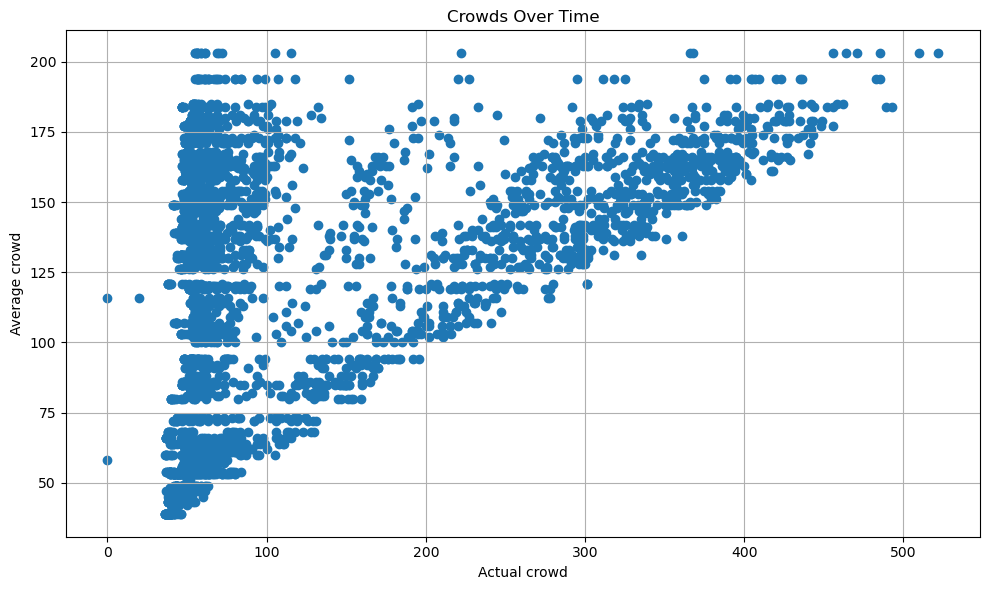

Mean Absolute Error: 67.42297892054668
Mean Squared Error: 8549.679175353254
Root Mean Squared Error: 92.46447520725597
R-squared Score: 0.20551290877347428


In [14]:
devices = df['Total Online Devices']
avg_devices = df['avgdevices']
mae = mean_absolute_error(devices, avg_devices)
mse = mean_squared_error(devices, avg_devices)
rmse = mean_squared_error(devices, avg_devices, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices, avg_devices)

plt.figure(figsize=(10, 6))
plt.scatter(devices, avg_devices)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Average crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

From this, we can determine that if our model passes an accuracy of 21%, it is considered to be beneficial.

In [15]:
dt = df.index
devices = df['Total Online Devices']

Since MLP cannot really work with the datetime format, what we can do instead is split each value into its own column. That way, the MLP model sees each value as a numerical one, thus making the prediction easier.

In [16]:
dt_features = pd.DataFrame()
dt_features['day'] = dt.day
dt_features['month'] = dt.month
dt_features['year'] = dt.year
dt_features['hour'] = dt.hour
dt_features['minute'] = dt.minute
dt_features['second'] = dt.second

In [17]:
dt_features

,day,month,year,hour,minute,second
0,1,9,2023,0,0,0
1,1,9,2023,1,0,0
2,1,9,2023,2,0,0
3,1,9,2023,3,0,0
4,1,9,2023,4,0,0
...,...,...,...,...,...,...
4312,29,2,2024,19,0,0
4313,29,2,2024,20,0,0
4314,29,2,2024,21,0,0
4315,29,2,2024,22,0,0


In [18]:
X_train, X_test, devices_train, devices_test = train_test_split(dt_features, devices, test_size=0.4, random_state=101)

Using relu as the activation makes the most sense, as we are dealing with numbers greater than 1, 6, and do not go into negative values.

In [19]:
#Default parameters, first test with these
regr = MLPRegressor(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.01,)
regr.fit(X_train, devices_train)

MLPRegressor(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, random_state=5)

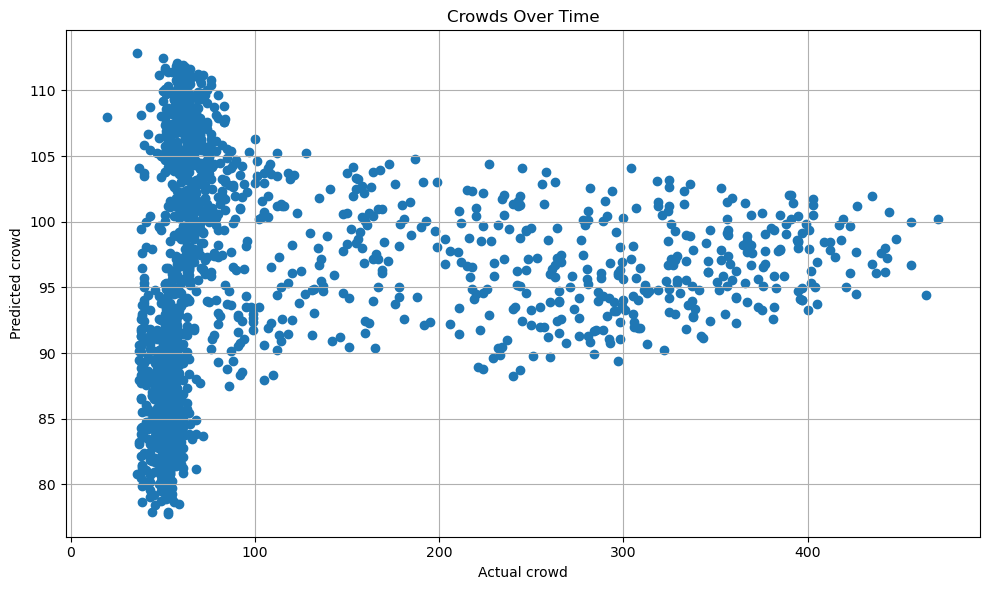

Mean Absolute Error: 71.36295269153382
Mean Squared Error: 11055.19093810119
Root Mean Squared Error: 105.14366808372813
R-squared Score: -0.010506097785647261


In [20]:
devices_pred = regr.predict(X_test)

mae = mean_absolute_error(devices_test, devices_pred)
mse = mean_squared_error(devices_test, devices_pred)
rmse = mean_squared_error(devices_test, devices_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test, devices_pred)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test, devices_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Trying again with an increased random_state:

In [21]:
#Default parameters, first test with these
regr = MLPRegressor(hidden_layer_sizes=(6,5),
                    random_state=10,
                    verbose=False,
                    learning_rate_init=0.01,)
regr.fit(X_train, devices_train)

MLPRegressor(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
             random_state=10)

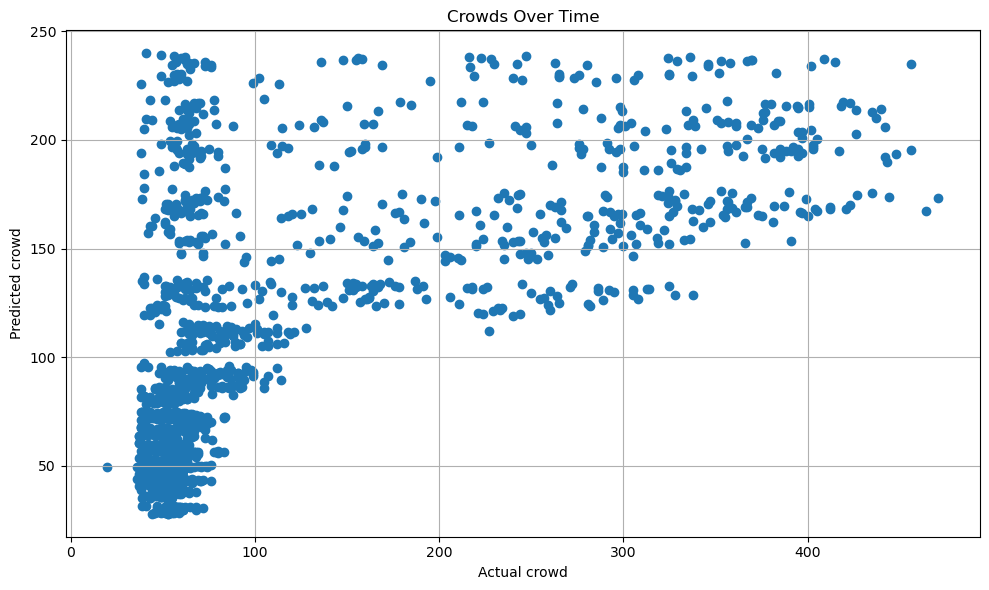

Mean Absolute Error: 52.50598371757462
Mean Squared Error: 6370.677416810488
Root Mean Squared Error: 79.8165234573048
R-squared Score: 0.41768455988169306


In [22]:
devices_pred = regr.predict(X_test)

mae = mean_absolute_error(devices_test, devices_pred)
mse = mean_squared_error(devices_test, devices_pred)
rmse = mean_squared_error(devices_test, devices_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test, devices_pred)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test, devices_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

MUCH better accuracy, yet still low...
Let's try having *less* layers for each variable

In [23]:
#Default parameters, first test with these
regr = MLPRegressor(hidden_layer_sizes=(3,2),
                    random_state=10,
                    max_iter=500,
                    verbose=False,
                    learning_rate_init=0.01,)
regr.fit(X_train, devices_train)

MLPRegressor(hidden_layer_sizes=(3, 2), learning_rate_init=0.01, max_iter=500,
             random_state=10)

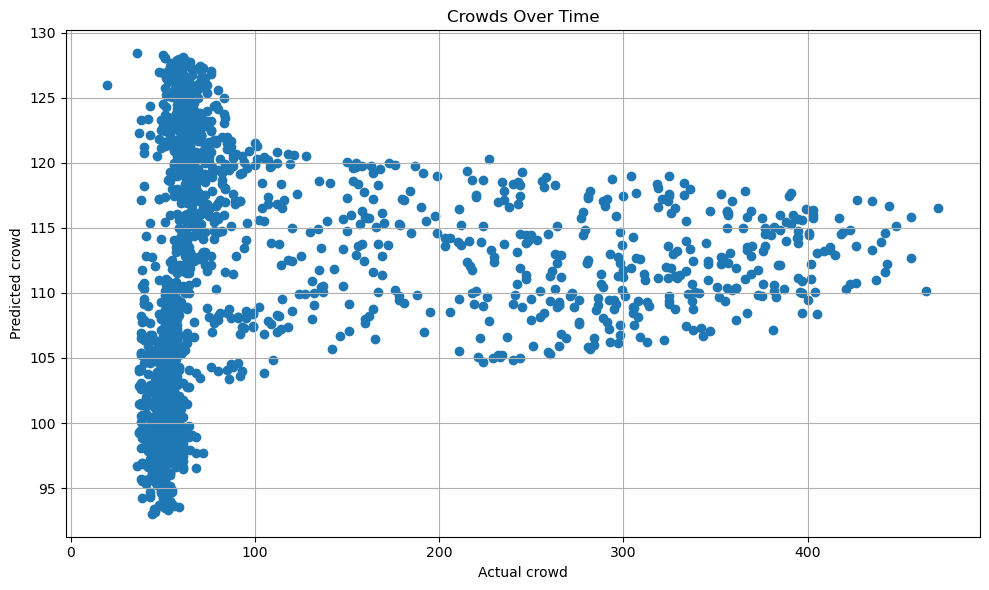

Mean Absolute Error: 78.87157286822928
Mean Squared Error: 10736.180056193822
Root Mean Squared Error: 103.6155396462993
R-squared Score: 0.018653275691690507


In [24]:
devices_pred = regr.predict(X_test)

mae = mean_absolute_error(devices_test, devices_pred)
mse = mean_squared_error(devices_test, devices_pred)
rmse = mean_squared_error(devices_test, devices_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test, devices_pred)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test, devices_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Worse, let's try *more* layers.

In [25]:
#Default parameters, first test with these
regr = MLPRegressor(hidden_layer_sizes=(7,6),
                    random_state=10,
                    verbose=False,
                    learning_rate_init=0.01,)
regr.fit(X_train, devices_train)

MLPRegressor(hidden_layer_sizes=(7, 6), learning_rate_init=0.01,
             random_state=10)

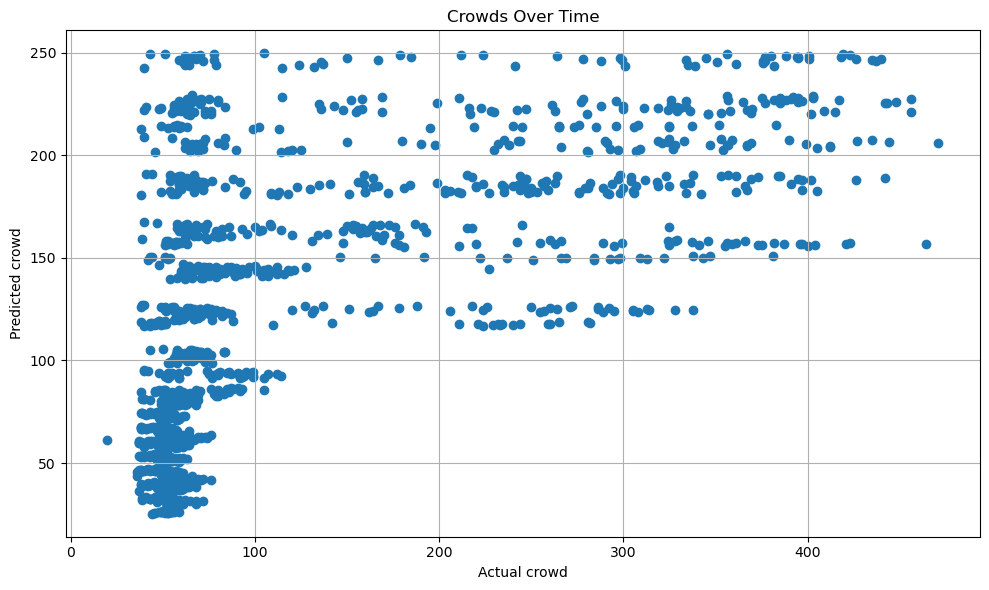

Mean Absolute Error: 56.33970624039525
Mean Squared Error: 6561.1319998603985
Root Mean Squared Error: 81.00081480985483
R-squared Score: 0.4002759489765779


In [26]:
devices_pred = regr.predict(X_test)

mae = mean_absolute_error(devices_test, devices_pred)
mse = mean_squared_error(devices_test, devices_pred)
rmse = mean_squared_error(devices_test, devices_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test, devices_pred)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test, devices_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Better, still low. We can also try increasing learning rate.

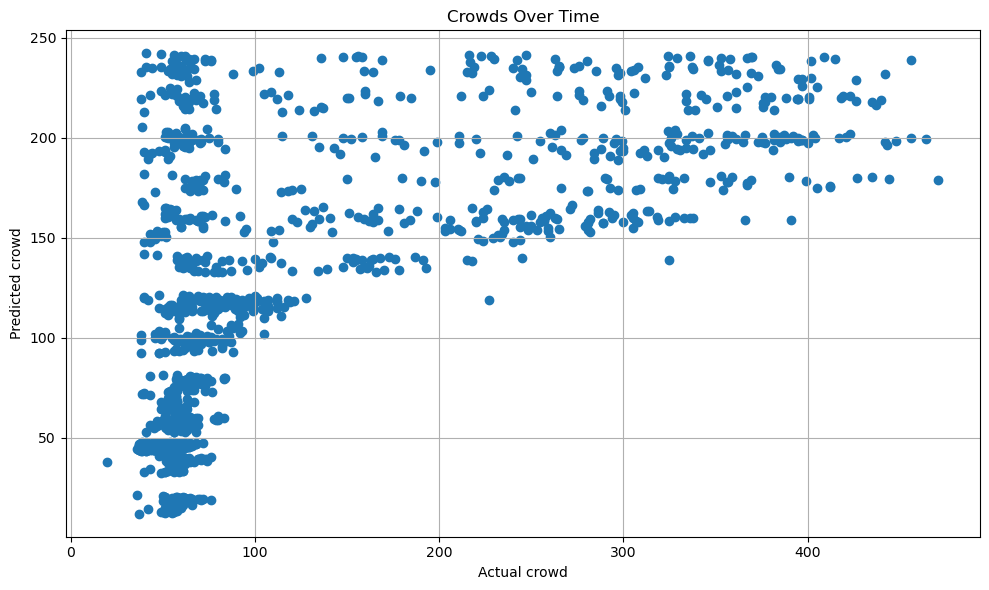

Mean Absolute Error: 51.72593701917648
Mean Squared Error: 6175.947462821762
Root Mean Squared Error: 78.58719655784753
R-squared Score: 0.4354839635309731


In [27]:
regr = MLPRegressor(hidden_layer_sizes=(6,5),
                    random_state=10,
                    verbose=False,
                    learning_rate_init=0.04,)
regr.fit(X_train, devices_train)

devices_pred = regr.predict(X_test)

mae = mean_absolute_error(devices_test, devices_pred)
mse = mean_squared_error(devices_test, devices_pred)
rmse = mean_squared_error(devices_test, devices_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test, devices_pred)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test, devices_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

.04 seems to be the best learning rate?

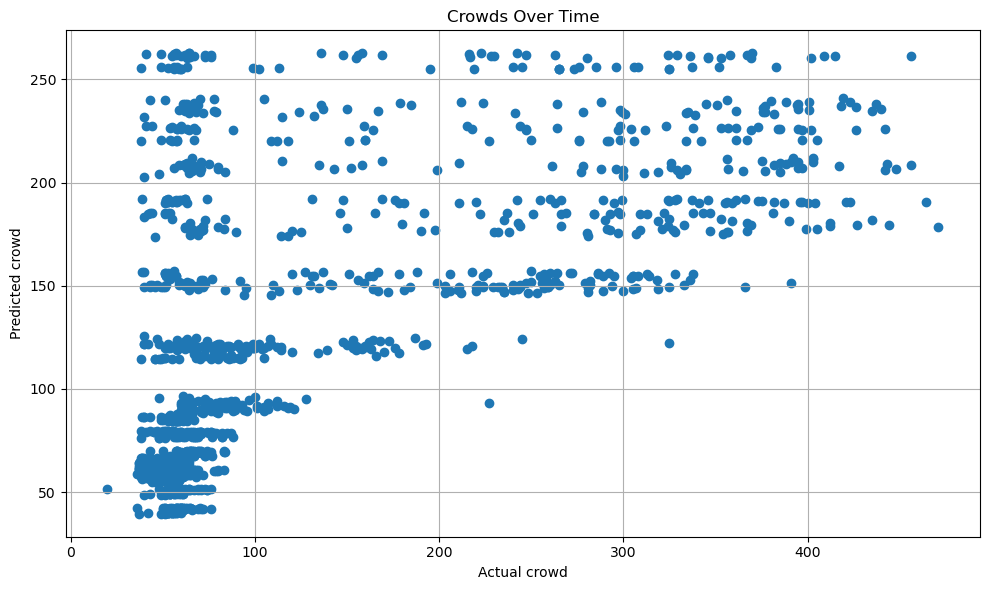

Mean Absolute Error: 50.909259051364785
Mean Squared Error: 6213.704722770059
Root Mean Squared Error: 78.82705577890157
R-squared Score: 0.43203273942936693


In [28]:
regr = MLPRegressor(hidden_layer_sizes=(14,15),
                    random_state=13,
                    max_iter=500,
                    verbose=False,
                    learning_rate_init=0.02,)
regr.fit(X_train, devices_train)

devices_pred = regr.predict(X_test)

mae = mean_absolute_error(devices_test, devices_pred)
mse = mean_squared_error(devices_test, devices_pred)
rmse = mean_squared_error(devices_test, devices_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test, devices_pred)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test, devices_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

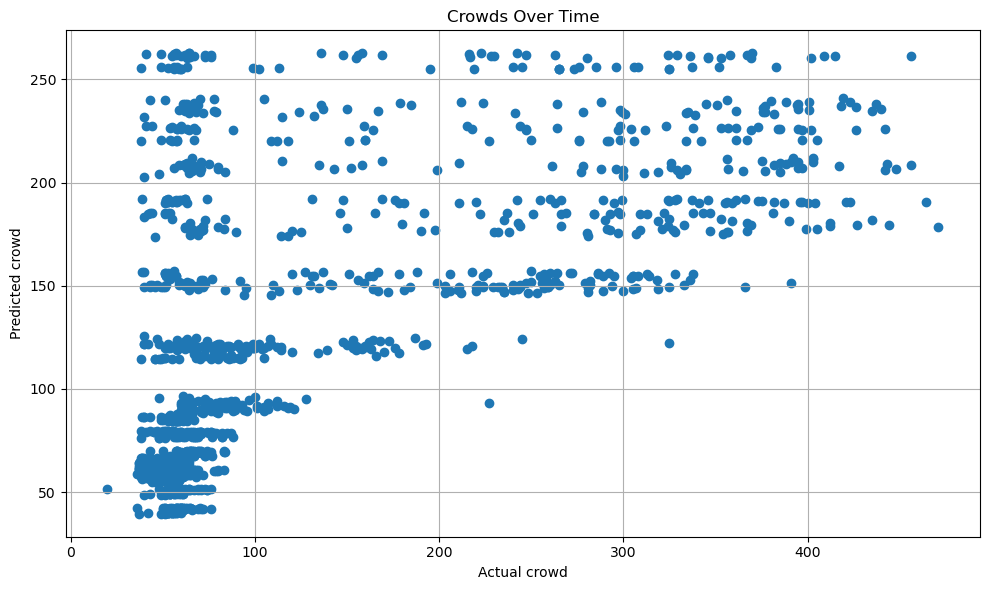

Mean Absolute Error: 50.909259051364785
Mean Squared Error: 6213.704722770059
Root Mean Squared Error: 78.82705577890157
R-squared Score: 0.43203273942936693


In [29]:
regr = MLPRegressor(hidden_layer_sizes=(14,15),
                    random_state=13,
                    max_iter=500,
                    verbose=False,
                    learning_rate_init=0.02,)
regr.fit(X_train, devices_train)

devices_pred = regr.predict(X_test)

mae = mean_absolute_error(devices_test, devices_pred)
mse = mean_squared_error(devices_test, devices_pred)
rmse = mean_squared_error(devices_test, devices_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test, devices_pred)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test, devices_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

These seem to be the best model hyperparameters:<br/>
<pre>
regr = MLPRegressor(hidden_layer_sizes=(6,5),<br/>
                    random_state=10,<br/>
                    verbose=False,<br/>
                    learning_rate_init=0.04,)<br/>
</pre>
regr.fit(X_train, devices_train)

Now let's see if the model works better if we only take the max online devices per day (max because it could be more beneficial for the client to prepare for the worst-case scenario), and make daily predictions instead of hourly.

In [30]:
df['maxdevicesperday'] = df.groupby(df.index.date)['Total Online Devices'].transform('max')
df['maxdevicesperday'].round().astype(int)
df

,Date Time,Total Online Devices,avgdevices,maxdevicesperday
datetime,,,,
2023-09-01 00:00:00,1-9-2023 00:00:00 - 01:00:00,61,104,195
2023-09-01 01:00:00,1-9-2023 01:00:00 - 02:00:00,58,104,195
2023-09-01 02:00:00,1-9-2023 02:00:00 - 03:00:00,57,104,195
2023-09-01 03:00:00,1-9-2023 03:00:00 - 04:00:00,57,104,195
2023-09-01 04:00:00,1-9-2023 04:00:00 - 05:00:00,57,104,195
...,...,...,...,...
2024-02-29 19:00:00,29-2-2024 19:00:00 - 20:00:00,65,173,434
2024-02-29 20:00:00,29-2-2024 20:00:00 - 21:00:00,63,173,434
2024-02-29 21:00:00,29-2-2024 21:00:00 - 22:00:00,65,173,434


In [31]:
df['date'] = df.index.date
df.drop_duplicates(subset='date', keep='first', inplace=True)
df

,Date Time,Total Online Devices,avgdevices,maxdevicesperday,date
datetime,,,,,
2023-09-01,1-9-2023 00:00:00 - 01:00:00,61,104,195,2023-09-01
2023-09-02,2-9-2023 00:00:00 - 01:00:00,62,64,72,2023-09-02
2023-09-03,3-9-2023 00:00:00 - 01:00:00,68,63,72,2023-09-03
2023-09-04,4-9-2023 00:00:00 - 01:00:00,61,163,387,2023-09-04
2023-09-05,5-9-2023 00:00:00 - 01:00:00,57,163,377,2023-09-05
...,...,...,...,...,...
2024-02-25,25-2-2024 00:00:00 - 01:00:00,55,58,74,2024-02-25
2024-02-26,26-2-2024 00:00:00 - 01:00:00,48,158,385,2024-02-26
2024-02-27,27-2-2024 00:00:00 - 01:00:00,51,174,443,2024-02-27


Let's check the baseline accuracy:

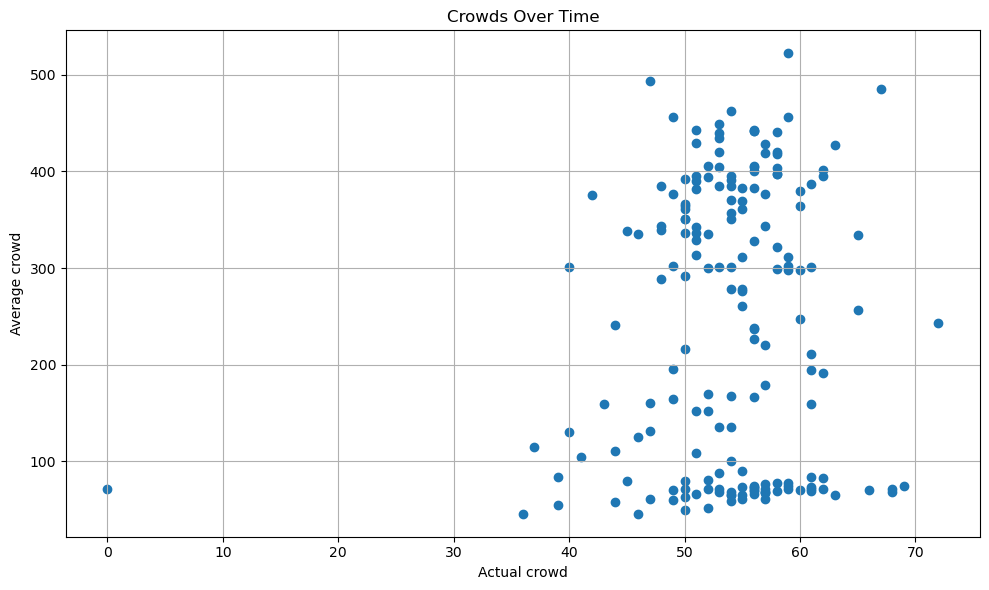

Mean Absolute Error: 186.08241758241758
Mean Squared Error: 55234.14835164835
Root Mean Squared Error: 235.01946377193602
R-squared Score: -1059.4608161644733


In [32]:
devices = df['Total Online Devices']
max_devices = df['maxdevicesperday']
mae = mean_absolute_error(devices, max_devices)
mse = mean_squared_error(devices, max_devices)
rmse = mean_squared_error(devices, max_devices, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices, max_devices)

plt.figure(figsize=(10, 6))
plt.scatter(devices, max_devices)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Average crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Highly innaccurate, literally anything else would work better.

In [33]:
df_daily = df['maxdevicesperday']
df_daily

datetime
2023-09-01    195
2023-09-02     72
2023-09-03     72
2023-09-04    387
2023-09-05    377
             ... 
2024-02-25     74
2024-02-26    385
2024-02-27    443
2024-02-28    390
2024-02-29    434
Name: maxdevicesperday, Length: 182, dtype: int32

In [34]:
devices_daily = df_daily
dt_daily = df.index

dt_features_daily = pd.DataFrame()
dt_features_daily['day'] = dt_daily.day
dt_features_daily['month'] = dt_daily.month
dt_features_daily['year'] = dt_daily.year

dt_features_daily

,day,month,year
0,1,9,2023
1,2,9,2023
2,3,9,2023
3,4,9,2023
4,5,9,2023
...,...,...,...
177,25,2,2024
178,26,2,2024
179,27,2,2024
180,28,2,2024


In [35]:
X_train_daily, X_test_daily, devices_train_daily, devices_test_daily = train_test_split(dt_features_daily, devices_daily, test_size=0.4, random_state=101)

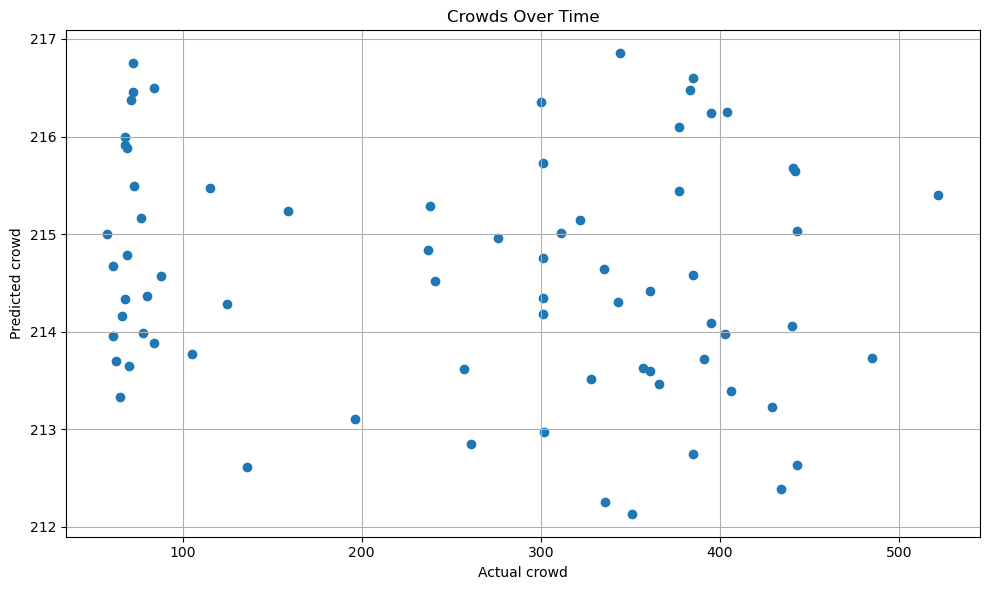

Mean Absolute Error: 139.14558804779793
Mean Squared Error: 22531.271765242574
Root Mean Squared Error: 150.10420302324175
R-squared Score: -0.07972882577543561


In [36]:
regr_daily = MLPRegressor(hidden_layer_sizes=(6,5),
                    random_state=10,
                    max_iter=500,
                    verbose=False,
                    learning_rate_init=0.04,)
regr_daily.fit(X_train_daily, devices_train_daily)

devices_pred_daily = regr_daily.predict(X_test_daily)

mae = mean_absolute_error(devices_test_daily, devices_pred_daily)
mse = mean_squared_error(devices_test_daily, devices_pred_daily)
rmse = mean_squared_error(devices_test_daily, devices_pred_daily, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(devices_test_daily, devices_pred_daily)

plt.figure(figsize=(10, 6))
plt.scatter(devices_test_daily, devices_pred_daily)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Ok, well, much worse... yet better than the baseline!

What about the cinema visitors?

In [37]:
cnm = pd.read_csv('cinema.csv', sep=';')
cnm

FileNotFoundError: [Errno 2] No such file or directory: 'cinema.csv'

In [ ]:
cnm = cnm.dropna()

In [ ]:
cnm['Visitor'] = cnm['Visitor'].astype(np.int64)
cnm

Baseline time! (average all visitors and keep predicting over that)

In [ ]:
cnm_bydate = cnm[['Date', 'Visitor']]
cnm_bydate

In [ ]:
cnm_bydate['visitors_mean'] = cnm_bydate['Visitor'].mean()
cnm_bydate['visitors_mean'] = cnm_bydate['visitors_mean'].round().astype(int)
cnm_bydate

In [ ]:
visitors_mean = cnm_bydate['visitors_mean']
daily_visitors = cnm_bydate['Visitor']
mae = mean_absolute_error(daily_visitors, visitors_mean)
mse = mean_squared_error(daily_visitors, visitors_mean)
rmse = mean_squared_error(daily_visitors, visitors_mean, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(daily_visitors, visitors_mean)

plt.figure(figsize=(10, 6))
plt.scatter(daily_visitors, visitors_mean)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Average crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Very low, and ofc very linear!

In [ ]:
cnm_bydate.set_index('Date', inplace=True)

In [ ]:
cnm_bydate.index = pd.to_datetime(cnm_bydate.index, format='%d/%m/%Y')
cnm_bydate

In [ ]:
cnm_bydate_features = pd.DataFrame()
cnm_dt = cnm_bydate.index
cnm_bydate_features['day'] = cnm_dt.day
cnm_bydate_features['month'] = cnm_dt.month
cnm_bydate_features['year'] = cnm_dt.year

In [ ]:
cnm_bydate_features

In [ ]:
visitors = cnm_bydate['Visitor']

In [ ]:
X_train, X_test, visitors_train, visitors_test = train_test_split(cnm_bydate_features, visitors, test_size=0.4, random_state=101)

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(6,4),
                    random_state=10,
                    verbose=False,
                    learning_rate_init=0.04)
regr.fit(X_train, visitors_train)

visitors_pred = regr.predict(X_test)

mae = mean_absolute_error(visitors_test, visitors_pred)
mse = mean_squared_error(visitors_test, visitors_pred)
rmse = mean_squared_error(visitors_test, visitors_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(visitors_test, visitors_pred)

plt.figure(figsize=(10, 6))
plt.scatter(visitors_test, visitors_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Very low, I fear... Still better!

In [ ]:
cnm_byday = cnm[['Day', 'Visitor']]
cnm_byday

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_day_of_week = encoder.fit_transform(cnm_byday['Day'].values.reshape(-1, 1))

In [ ]:
X_train, X_test, visitors_train, visitors_test = train_test_split(encoded_day_of_week, visitors, test_size=0.4, random_state=101)

In [ ]:
clf = MLPClassifier(
                    hidden_layer_sizes=(12,10),
                    random_state=5,
                    max_iter=500,
                    verbose=False,
                    learning_rate_init=0.01
                   )
clf.fit(X_train, visitors_train)

visitors_pred = clf.predict(X_test)

mae = mean_absolute_error(visitors_test, visitors_pred)
mse = mean_squared_error(visitors_test, visitors_pred)
rmse = mean_squared_error(visitors_test, visitors_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(visitors_test, visitors_pred)

plt.figure(figsize=(10, 6))
plt.scatter(visitors_test, visitors_pred)
plt.title('Crowds Over Time')
plt.xlabel('Actual crowd')
plt.ylabel('Predicted crowd')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Changed the parameters a bit, but it seems to have a strong but negative correlation